In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    


In [2]:
train = pd.read_csv('cs-training.csv')
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test = pd.read_csv('cs-test.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
train.shape

(150000, 11)

In [8]:
test.shape

(101503, 11)

In [9]:
#checking the duplicate data

train.duplicated().value_counts()

False    149391
True        609
Name: count, dtype: int64

In [10]:
train_redup = train.drop_duplicates()

In [11]:
train_redup.duplicated().value_counts()

False    149391
Name: count, dtype: int64

In [12]:
# checking null values

def findMiss(df):
    return round(df.isnull().sum()/len(df)*100, 2)

In [13]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [14]:
train_redup[train_redup.NumberOfDependents.isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [15]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [16]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


C:\Users\RAHUL AVSSTECH\AppData\Local\Temp\ipykernel_10336\3358341527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\RAHUL AVSSTECH\AppData\Local\Temp\ipykernel_10336\3358341527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [17]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [18]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [19]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


C:\Users\RAHUL AVSSTECH\AppData\Local\Temp\ipykernel_10336\269513490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [20]:

findMiss(fam_nmiss)


SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [21]:
filled_train = pd.concat([fam_miss, fam_nmiss], axis=0)


In [22]:
findMiss(filled_train)


SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [23]:
filled_train.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
96,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
109,0,0.041258,61,0,4739.0,0.0,11,0,4,0,0.0
159,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
238,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0


In [24]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [25]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [26]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.5, .75, .9, .95, .97, .98, .99])

0.50    0.154235
0.75    0.556494
0.90    0.978007
0.95    1.000000
0.97    1.000000
0.98    1.006516
0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [27]:

filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000
mean,0.372478,259.773362,44.055405,1.016260,245.169459,5208.603433,6.373683,0.637760,0.682023,0.43240,0.900933
std,0.483538,1659.034074,12.655322,1.355169,939.844850,4745.289417,4.033118,1.325063,0.973476,0.85219,1.193154
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.019996,34.000000,0.000000,0.180627,2900.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.074633,43.000000,1.000000,0.374304,4800.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.301096,52.000000,2.000000,0.806048,5836.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


In [28]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1]).groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [29]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [30]:
# drop the records more than 10 - RevolvingUtilizationOfUnsecuredLines (outliers)

util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)

In [31]:
util_droped.shape

(149150, 11)

<Axes: >

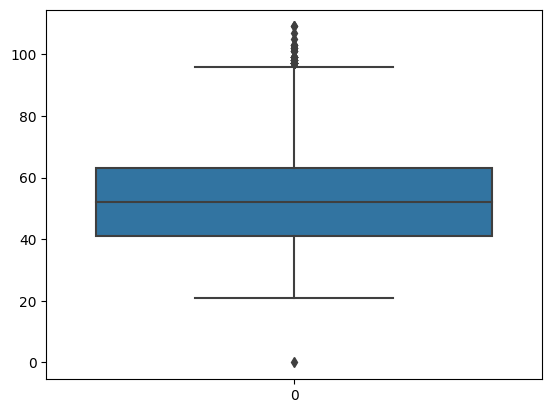

In [32]:
sns.boxplot(util_droped['age'])

In [33]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [34]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [35]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [39]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96]['SeriousDlqin2yrs'].describe()

count    225.000000
mean       0.604444
std        0.490060
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [40]:
# all the outliers having good amount of default cases hence can't delete them
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby('SeriousDlqin2yrs').size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [41]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

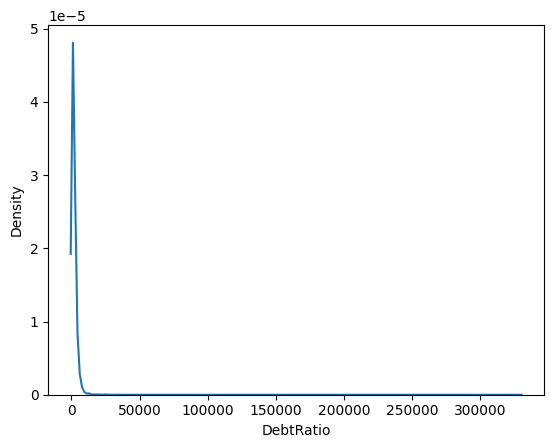

In [42]:
sns.kdeplot(util_droped['DebtRatio'])

In [43]:
util_droped['DebtRatio'].quantile([.5,.75, .80, .90, .95, .97, .99 ])

0.50       0.368200
0.75       0.874241
0.80       4.000000
0.90    1273.000000
0.95    2454.550000
0.97    3229.530000
0.99    4984.000000
Name: DebtRatio, dtype: float64

In [44]:
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]


In [45]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)


In [46]:
dRatio.shape

(148768, 11)

In [47]:
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
96,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
159,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
238,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0
263,0,0.024671,78,0,392.0,0.0,6,0,1,0,0.0


In [49]:
dRatio.groupby('SeriousDlqin2yrs').size()/dRatio.shape[0]

SeriousDlqin2yrs
0    0.932848
1    0.067152
dtype: float64

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [74]:
# Train test split

X = dRatio.drop(['SeriousDlqin2yrs'], axis=1)
y = dRatio['SeriousDlqin2yrs']

In [80]:
# Calculate the scale_pos_weight
scale_pos_weight = sum(y == 0) / sum(y == 1)

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [91]:
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, 
                      scoring='roc_auc', cv=5, verbose=3, n_jobs=-1)

In [92]:
grid_search.fit(X,y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=3)

In [93]:
# Get the best hyperparameters found during the search

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1.0}


In [95]:
# Train the XGBoost classifier with the best hyperparameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params, scale_pos_weight=scale_pos_weight)
best_xgb_classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [96]:
# Make predictions on the test data
y_pred = best_xgb_classifier.predict(X)

In [100]:
def result(y, ypred):
    print('accuracy score :', accuracy_score(y, y_pred)),
    print('roc_auc_score :', roc_auc_score(y, y_pred))
    print(confusion_matrix(y, y_pred)),
    print(classification_report(y, y_pred))



In [101]:
result(y, y_pred)

accuracy score : 0.7992847924284793
roc_auc_score : 0.7944610176765129
[[111027  27751]
 [  2109   7881]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88    138778
           1       0.22      0.79      0.35      9990

    accuracy                           0.80    148768
   macro avg       0.60      0.79      0.61    148768
weighted avg       0.93      0.80      0.85    148768



In [63]:
roc_curve(y, y_pred)

(array([0.        , 0.00549078, 1.        ]),
 array([0.        , 0.28908909, 1.        ]),
 array([inf,  1.,  0.]))